### Bibliotecas

In [52]:
#Pandas
import pandas as pd 

#Folium 
import folium 

#Numpy (Computação Científica)
import numpy as np

### Carga dos Dados 

In [53]:
# Carga de dados no dataset inicial 
df_vacinas = pd.read_excel(
    "Base_Vacinas_Tratadas.xlsx"
    , sheet_name=0, na_values = ['', ' ']
    , dtype  = {'CODMUN7': np.int64, 'ano': np.int32, 'Estado': 'category'
        , 'CV_SCR1 (1 ano)': np.float32, 'CV_SCR2 (15 meses)': np.float32, 'Poprural': np.float32
        , 'PopUrb': np.float32, 'RDPC': np.float32, 'PEA': np.float32, 'PEA_A': np.float32
        , 'IDHM': np.float32, 'IDHM_E': np.float32, 'IDHM_L': np.float32, 'IDHM_R': np.float32
        , 'T_ANALF18M': np.float32, 'T_MED18M': np.float32,'T_SUPER25M': np.float32, 'T_AGUA': np.float32
        , 'T_BANAGUA': np.float32, 'T_DENS': np.float32, 'T_LIXO': np.float32
        , 'T_LUZ': np.float32,'AGUA_ESGOTO': np.float32, 'POPDOMCHEFMULHERES': np.float32, 'DENSDEMOG2010': np.float32
        , 'PERC_NV_7CPN': np.float32,'CoberturaAB': np.float32
})
df_vacinas.shape

(1347, 29)

In [54]:
# Carga de dados de localização de muncipios

df_estados = pd.read_csv('estados.csv', sep = ',', encoding = 'utf-8', low_memory=False, decimal='.')

df_municipios = pd.read_csv('municipios.csv', sep = ',', encoding = 'utf-8', low_memory=False, decimal='.')

## Mapas

In [55]:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start="04")
mapa

### Distribuição dos dados no nível de estado

In [60]:
df_vacinas.head()

,COD,CODMUN7,Estado,ano,Nome,CV_SCR1 (1 ano),CV_SCR2 (15 meses),Poprural,PopUrb,RDPC,...,T_AGUA,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,CoberturaAB
0,110001,1100015,Rondônia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.730000,57.270000,476.989990,...,93.690002,80.199997,22.58,94.050003,93.980003,9.31,26.920000,3.450000,67.180000,80.930000
1,110002,1100023,Rondônia,2016,Ariquemes,98.919998,89.519997,15.300000,84.699997,689.950012,...,98.540001,85.349998,27.15,96.720001,98.580002,11.40,32.630001,20.410000,72.620003,61.919998
2,110003,1100031,Rondônia,2016,Cabixi,109.639999,77.110001,57.340000,42.660000,457.170013,...,95.489998,91.629997,19.93,99.139999,96.360001,3.31,16.420000,4.800000,65.750000,100.000000
3,110004,1100049,Rondônia,2016,Cacoal,99.180000,82.320000,21.190001,78.809998,738.059998,...,97.959999,93.440002,20.50,98.169998,98.889999,1.85,31.730000,20.719999,74.589996,71.190002
4,110005,1100056,Rondônia,2016,Cerejeiras,99.279999,85.510002,15.330000,84.669998,577.179993,...,97.529999,86.870003,16.66,91.889999,98.849998,5.34,39.970001,6.120000,76.809998,95.910004


In [58]:
# Merge dataset vacinas e geolocalização
df_plot_estados = pd.merge(df_vacinas, df_estados, how='left', left_on='Estado', right_on='nome')
df_plot_estados.head()


,COD,CODMUN7,Estado,ano,Nome,CV_SCR1 (1 ano),CV_SCR2 (15 meses),Poprural,PopUrb,RDPC,...,AGUA_ESGOTO,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,CoberturaAB,codigo_uf,uf,nome,latitude,longitude
0,110001,1100015,Rondônia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.730000,57.270000,476.989990,...,9.31,26.920000,3.450000,67.180000,80.930000,11,RO,Rondônia,-10.83,-63.34
1,110002,1100023,Rondônia,2016,Ariquemes,98.919998,89.519997,15.300000,84.699997,689.950012,...,11.40,32.630001,20.410000,72.620003,61.919998,11,RO,Rondônia,-10.83,-63.34
2,110003,1100031,Rondônia,2016,Cabixi,109.639999,77.110001,57.340000,42.660000,457.170013,...,3.31,16.420000,4.800000,65.750000,100.000000,11,RO,Rondônia,-10.83,-63.34
3,110004,1100049,Rondônia,2016,Cacoal,99.180000,82.320000,21.190001,78.809998,738.059998,...,1.85,31.730000,20.719999,74.589996,71.190002,11,RO,Rondônia,-10.83,-63.34
4,110005,1100056,Rondônia,2016,Cerejeiras,99.279999,85.510002,15.330000,84.669998,577.179993,...,5.34,39.970001,6.120000,76.809998,95.910004,11,RO,Rondônia,-10.83,-63.34


In [61]:
df_plot_estados.head(4)

,COD,CODMUN7,Estado,ano,Nome,CV_SCR1 (1 ano),CV_SCR2 (15 meses),Poprural,PopUrb,RDPC,...,AGUA_ESGOTO,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,CoberturaAB,codigo_uf,uf,nome,latitude,longitude
0,110001,1100015,Rondônia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.730000,57.270000,476.989990,...,9.31,26.920000,3.450000,67.180000,80.930000,11,RO,Rondônia,-10.83,-63.34
1,110002,1100023,Rondônia,2016,Ariquemes,98.919998,89.519997,15.300000,84.699997,689.950012,...,11.40,32.630001,20.410000,72.620003,61.919998,11,RO,Rondônia,-10.83,-63.34
2,110003,1100031,Rondônia,2016,Cabixi,109.639999,77.110001,57.340000,42.660000,457.170013,...,3.31,16.420000,4.800000,65.750000,100.000000,11,RO,Rondônia,-10.83,-63.34
3,110004,1100049,Rondônia,2016,Cacoal,99.180000,82.320000,21.190001,78.809998,738.059998,...,1.85,31.730000,20.719999,74.589996,71.190002,11,RO,Rondônia,-10.83,-63.34


In [ ]:
# Extraindo as coordenadas
for lat,lng in zip(df_plot_estados.latitude.values,df_plot_estados.longitude.values):
     folium.Marker([lat, lng]).add_to(mapa)
mapa

### Distribuição dos dados no nível de município

In [63]:
# Merge dataset vacinas e geolocalização
df_plot_municipios = pd.merge(df_vacinas, df_municipios, how='left', left_on='CODMUN7', right_on='codigo_ibge')

In [64]:
df_plot_municipios.head(4)

,COD,CODMUN7,Estado,ano,Nome,CV_SCR1 (1 ano),CV_SCR2 (15 meses),Poprural,PopUrb,RDPC,...,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,CoberturaAB,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,110001,1100015,Rondônia,2016,Alta Floresta D'Oeste,96.449997,92.080002,42.730000,57.270000,476.989990,...,26.920000,3.450000,67.180000,80.930000,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
1,110002,1100023,Rondônia,2016,Ariquemes,98.919998,89.519997,15.300000,84.699997,689.950012,...,32.630001,20.410000,72.620003,61.919998,1100023,Ariquemes,-9.90571,-63.0325,0,11
2,110003,1100031,Rondônia,2016,Cabixi,109.639999,77.110001,57.340000,42.660000,457.170013,...,16.420000,4.800000,65.750000,100.000000,1100031,Cabixi,-13.49450,-60.5520,0,11
3,110004,1100049,Rondônia,2016,Cacoal,99.180000,82.320000,21.190001,78.809998,738.059998,...,31.730000,20.719999,74.589996,71.190002,1100049,Cacoal,-11.43430,-61.4562,0,11


In [65]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_plot_municipios.latitude.values,df_plot_municipios.longitude.values):
  coordenadas.append([lat,lng])

In [66]:
# Renderizando o mapa
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4.5,tiles='Stamen Toner')
mapa

In [67]:
# Adicionando os registros no mapa de calor:
from folium import plugins

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

### Municipios com aplicação de primeira dose entre < 50%

In [68]:
df_municipios_1d_50 = df_vacinas[df_vacinas['CV_SCR1 (1 ano)'] < 50]

In [69]:
df_municipios_1d_50.shape

(45, 29)

In [ ]:
# Merge dataset vacinas e geolocalização
df_municipios_1d_50 = pd.merge(df_municipios_1d_50, df_municipios, how='left', left_on='CODMUN7', right_on='codigo_ibge')
df_municipios_1d_50

In [71]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_municipios_1d_50.latitude.values,df_municipios_1d_50.longitude.values):
  coordenadas.append([lat,lng])

In [72]:
# Adicionando os registros no mapa de calor:
from folium import plugins

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

#### Municipios com aplicação de segunda dose entre < 50%

In [73]:
df_municipios_2d_50 = df_vacinas[df_vacinas['CV_SCR2 (15 meses)'] < 50]

In [74]:
df_municipios_2d_50.shape

(151, 29)

In [75]:
# Merge dataset vacinas e geolocalização
df_municipios_2d_50 = pd.merge(df_municipios_2d_50, df_municipios, how='left', left_on='CODMUN7', right_on='codigo_ibge')

In [76]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_municipios_2d_50.latitude.values,df_municipios_2d_50.longitude.values):
  coordenadas.append([lat,lng])

In [77]:
# Adicionando os registros no mapa de calor:
from folium import plugins

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

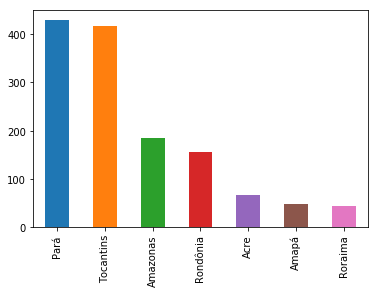

In [78]:
#Distribuição dos dados entre os Estados

df_vacinas["Estado"].value_counts().plot(kind='bar')

#### Municipios com aplicação ideal, entre 95% e 120%

In [79]:
df_municipios_1d_ideal = df_vacinas[(df_vacinas["CV_SCR1 (1 ano)"] >= 95) & (df_vacinas["CV_SCR1 (1 ano)"] <= 120)]

In [80]:
df_municipios_1d_ideal.shape

(438, 29)

In [81]:
# Merge dataset vacinas e geolocalização
df_municipios_1d_ideal = pd.merge(df_municipios_1d_ideal, df_municipios, how='left', left_on='CODMUN7', right_on='codigo_ibge')

In [82]:
# Extraindo as coordenadas
coordenadas=[]
for lat,lng in zip(df_municipios_1d_ideal.latitude.values,df_municipios_1d_ideal.longitude.values):
  coordenadas.append([lat,lng])

In [83]:
# Adicionando os registros no mapa de calor:
from folium import plugins

mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

### Municipios com aplicação de primeira dose entre < 50%

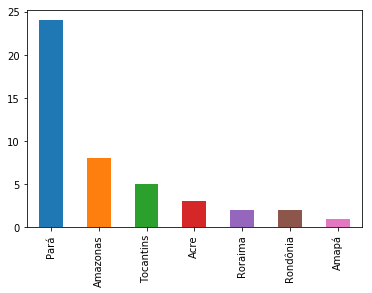

In [84]:
df_municipios_1d_50["Estado"].value_counts().plot(kind='bar')

In [85]:
# Menor indice de vacinação de primeira dose 
index1 = np.where(df_municipios_1d_50["CV_SCR1 (1 ano)"] == min(df_municipios_1d_50["CV_SCR1 (1 ano)"]) )

In [86]:
#Municipio com menor indice de vacinação
df_menor_vacinacao = df_municipios_1d_50.iloc[index1]
df_menor_vacinacao 

,COD,CODMUN7,Estado,ano,Nome,CV_SCR1 (1 ano),CV_SCR2 (15 meses),Poprural,PopUrb,RDPC,...,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,CoberturaAB,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
26,171884,1718840,Tocantins,2016,Sandolƒndia,5.13,17.950001,46.959999,53.040001,393.980011,...,20.02,0.94,67.440002,100.0,1718840,Sandolândia,-12.538,-49.9242,0,17


In [87]:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start="04")
folium.Marker([-12.538,-49.9242]).add_to(mapa)
mapa

In [88]:
df_lim_sand = df_municipios[df_municipios["nome"].isin(["Araguaçu","São Miguel do Araguaia","Formoso do Araguaia","Figueirópolis"])]

In [89]:
df_lim_sand

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
312,1702000,Araguaçu,-12.9289,-49.8231,0,17
1786,1707652,Figueirópolis,-12.1312,-49.1748,0,17
1827,1708205,Formoso do Araguaia,-11.7976,-49.5316,0,17
4839,5220207,São Miguel do Araguaia,-13.2731,-50.1634,0,52


In [90]:
#Brasil
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start="04")

#Marcador em Sandolândia 
folium.Marker(
    [-12.538,-49.9242],
    popup='<i>Menor indice de Vacinação</i>', 
    icon=folium.Icon(color='green')
    ).add_to(mapa)
mapa

In [91]:
# Extraindo as coordenadas
for lat,lng in zip(df_lim_sand.latitude.values,df_lim_sand.longitude.values):
     folium.Marker([lat, lng]).add_to(mapa)

In [92]:
mapa

### Melhores Indices de Vacinação ( Primeira Dose ) 

In [93]:
# Melhor indice de vacinação de primeira dose 
index2 = np.where(df_municipios_1d_ideal["CV_SCR1 (1 ano)"] == max(df_municipios_1d_ideal["CV_SCR1 (1 ano)"]) )

In [94]:
df_maior_vacinacao = df_municipios_1d_ideal.iloc[index2]
df_maior_vacinacao
#df_maior_vacinacao["Nome"] 

,COD,CODMUN7,Estado,ano,Nome,CV_SCR1 (1 ano),CV_SCR2 (15 meses),Poprural,PopUrb,RDPC,...,POPDOMCHEFMULHERES,DENSDEMOG2010,PERC_NV_7CPN,CoberturaAB,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
29,130014,1300144,Amazonas,2016,Apu¡,120.0,115.500000,41.160000,58.840000,380.619995,...,26.139999,0.33,76.779999,100.00,1300144,Apuí,-7.194090,-59.8960,0,13
45,140023,1400233,Roraima,2016,Caroebe,120.0,122.959999,59.029999,40.970001,334.970001,...,24.270000,0.67,51.029999,100.00,1400233,Caroebe,0.884203,-59.6959,0,14
84,170388,1703883,Tocantins,2016,Carmolƒndia,120.0,153.330002,21.240000,78.760002,382.309998,...,45.049999,6.82,78.129997,100.00,1703883,Carmolândia,-7.032620,-48.3978,0,17
136,110050,1100502,Rondônia,2017,Novo Horizonte do Oeste,120.0,96.842102,83.080002,16.920000,346.380005,...,17.889999,12.14,67.032967,100.00,1100502,Novo Horizonte do Oeste,-11.696100,-61.9951,0,11
141,110145,1101450,Rondônia,2017,Parecis,120.0,132.000000,63.119999,36.880001,343.730011,...,15.250000,1.89,72.549019,100.00,1101450,Parecis,-12.175400,-61.6032,0,11
246,171200,1712009,Tocantins,2017,Lajeado,120.0,110.909088,21.889999,78.110001,527.210022,...,18.830000,8.60,80.327866,100.00,1712009,Lajeado,-9.749960,-48.3565,0,17
296,110120,1101203,Rondônia,2018,Ministro Andreazza,120.0,117.000000,70.309998,29.690001,448.380005,...,20.290001,12.97,73.913040,64.18,1101203,Ministro Andreazza,-11.196000,-61.5174,0,11


In [95]:
df_maiores = df_municipios[df_municipios["codigo_ibge"].isin(df_maior_vacinacao["CODMUN7"])]

In [96]:
df_maiores

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
286,1300144,Apuí,-7.194090,-59.8960,0,13
1135,1703883,Carmolândia,-7.032620,-48.3978,0,17
1145,1400233,Caroebe,0.884203,-59.6959,0,14
2721,1712009,Lajeado,-9.749960,-48.3565,0,17
3073,1101203,Ministro Andreazza,-11.196000,-61.5174,0,11
3406,1100502,Novo Horizonte do Oeste,-11.696100,-61.9951,0,11
3612,1101450,Parecis,-12.175400,-61.6032,0,11


In [97]:
#Reinicia o Mapa
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start="04")

In [98]:
# Extraindo as coordenadas
for lat,lng in zip(df_maiores.latitude.values,df_maiores.longitude.values):
     folium.Marker([lat, lng]).add_to(mapa)
mapa